# Prediction of house price

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory data analysis 

In [2]:
df=pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# exploring data

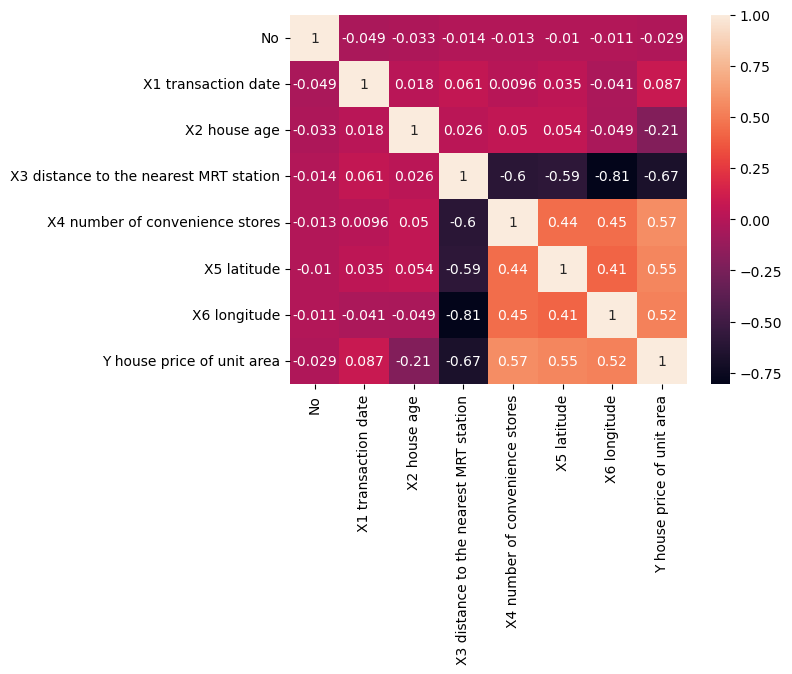

In [5]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

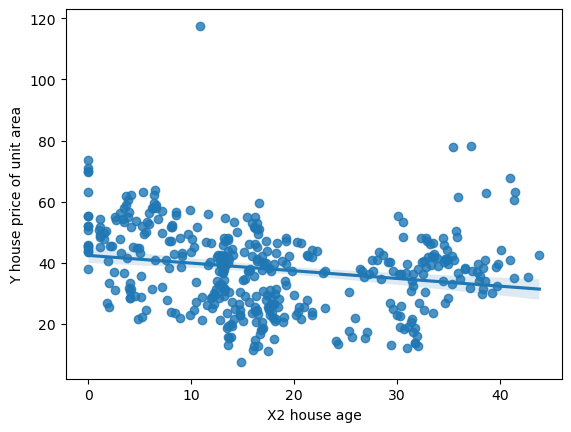

In [7]:
sns.regplot(data=df,x='X2 house age',y='Y house price of unit area')
plt.show()

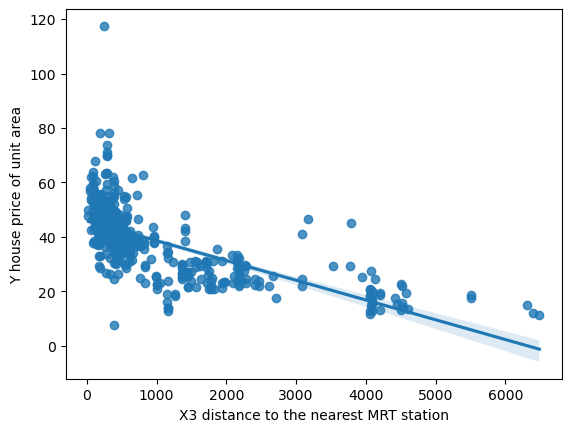

In [8]:
sns.regplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area')
plt.show()

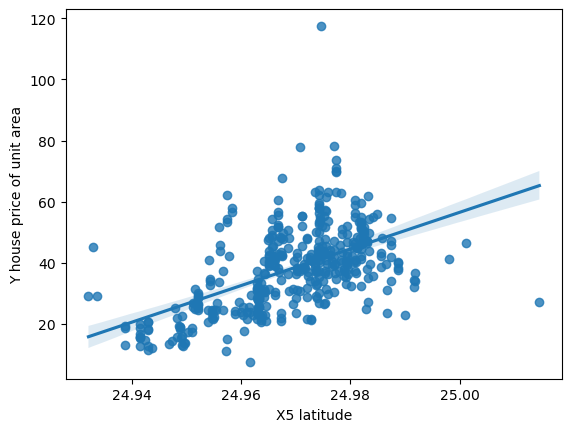

In [9]:
sns.regplot(data=df,x='X5 latitude',y='Y house price of unit area')
plt.show()

# model building & training

In [10]:
df.drop('No',axis=1,inplace=True)
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
X=df.loc[:,'X2 house age']
y=df.iloc[:,6]
X

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 1)using statsmodels (statical approach)

In [13]:
import statsmodels.api as sm
X_stat=sm.add_constant(X)

In [14]:
reg_stat=sm.OLS(y,X_stat).fit()

In [15]:
reg_stat.params

const           42.434697
X2 house age    -0.251488
dtype: float64

In [16]:
#price=-0.251488*latitude + 42.434697

# 2)using scikit-learn(machine learning approach)

In [17]:
from sklearn.linear_model import LinearRegression
X_ml=X_train.values.reshape(-1,1)

In [18]:
reg_ml=LinearRegression().fit(X_ml,y_train)

In [19]:
reg_ml.coef_

array([-0.29214369])

In [20]:
reg_ml.intercept_

43.40388225808728

# model predication & evaluation

# 1)using statesmodel(Statical approach)

In [21]:
reg_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.044
Model:                                    OLS   Adj. R-squared:                  0.042
Method:                         Least Squares   F-statistic:                     19.11
Date:                        Sun, 22 Oct 2023   Prob (F-statistic):           1.56e-05
Time:                                23:51:24   Log-Likelihood:                -1658.3
No. Observations:                         414   AIC:                             3321.
Df Residuals:                             412   BIC:                             3329.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.4347      1.211     35.042      0.000      40.054      44.815
X2 house age    -0.2515      0.058     -4.372      0.000      -0.365      -0.138
==============================================================================
Omnibus:                       48.404   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.054
Skew:                           0.589   Prob(JB):                     1.40e-26
Kurtosis:                       5.348   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

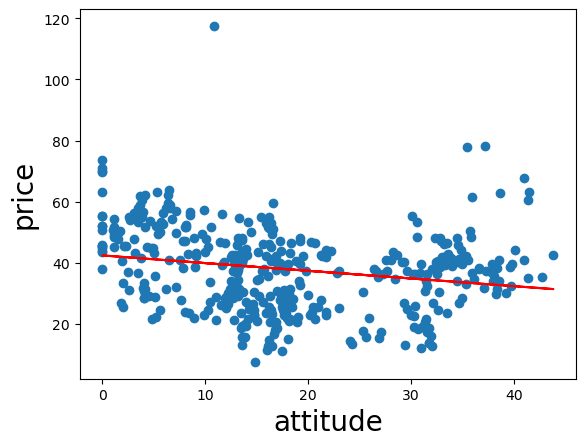

In [22]:
plt.scatter(X,y)
y_hat=-0.251488*X_stat + 42.434697
fig=plt.plot(X_stat,y_hat,c='r')
plt.xlabel('attitude',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

# 2)using scikit-learn(machine learning approch)

In [23]:
y_pred=reg_ml.predict(X_test.values.reshape(-1,1))

In [24]:
y_pred

array([40.39480223, 36.39243365, 33.32492489, 35.92500375, 39.1970131 ,
       32.71142314, 32.94513809, 33.23728178, 40.33637349, 38.37901076,
       39.51837116, 39.51837116, 39.69365737, 33.47099674, 42.06002128,
       32.91592372, 33.8799979 , 43.40388226, 39.60601426, 33.23728178,
       41.73866321, 39.89815796, 34.6395715 , 38.70036882, 42.79038051,
       39.02172688, 38.08686707, 34.52271403, 41.82630632, 40.39480223,
       42.20609312, 38.11608144, 43.40388226, 32.97435246, 38.23293891,
       39.83972922, 33.70471169, 41.91394943, 41.41730515, 38.14529581,
       43.40388226, 32.24399323, 38.75879756, 33.96764101, 38.5250826 ,
       41.50494826, 34.84407209, 38.70036882, 40.19030165, 42.20609312,
       41.50494826, 33.32492489, 37.70708027, 34.5519284 , 39.92737233,
       33.20806741, 42.29373623, 35.63286006, 39.63522863, 38.23293891,
       33.09120994, 31.68892022, 39.31387057, 40.51165971, 33.64628295,
       37.2980791 , 34.81485772, 34.02606975, 42.49823681, 32.71

# evaluating

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
#MAE
print(mean_absolute_error(y_test,y_pred))

10.392379606570108


In [27]:
#MSE
print(mean_squared_error(y_test,y_pred))

170.43854820309366


In [28]:
#RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred)))

13.055211534214743


In [29]:
#we can see clearly that mean of test is closelyu to mean of prediction

In [30]:
np.mean(y_test)

37.16400000000002

In [31]:
np.mean(y_pred)

37.988940501284446

In [32]:
#R^2
reg_ml.score(X_train.values.reshape(-1,1),y_train)

0.05738473442471015

In [33]:
reg_ml.score(X_test.values.reshape(-1,1),y_test)

-8.405027617253147e-05

In [34]:
r2_score(y_pred,y_test)#but the score is so week

-14.151295375974522